<a href="https://colab.research.google.com/github/jaco-uoeo/ml-artefact/blob/main/Unit02/auto_mpgh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA with Auto-mpg dataset

Main deliverables for this EDA:

- Identify missing values
- Estimate Skewness and Kurtosis
- Correlation Heat Map
- Scatter plot for different parameters
- Replace categorical values with numerical values (i.e., America 1, Europe 2 etc.)

In [2]:
# @title Dependencies

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import missingno as msno

In [35]:
# @title Load Data
df = pd.read_csv("https://raw.githubusercontent.com/jaco-uoeo/ml-artefact/refs/heads/main/Unit02/auto-mpg.csv")

In [5]:
# @title Identify missing values
df.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model year,0
origin,0
car name,0


## Estimate Skewness and Kurtosis

In [8]:
# @title Skewness
df.skew(numeric_only=True)

,0
mpg,0.457066
cylinders,0.526922
displacement,0.719645
weight,0.531063
acceleration,0.278777
model year,0.011535
origin,0.923776


In [9]:
# @title Kurtosis
df.kurt(numeric_only=True)

,0
mpg,-0.510781
cylinders,-1.376662
displacement,-0.746597
weight,-0.785529
acceleration,0.419497
model year,-1.181232
origin,-0.817597


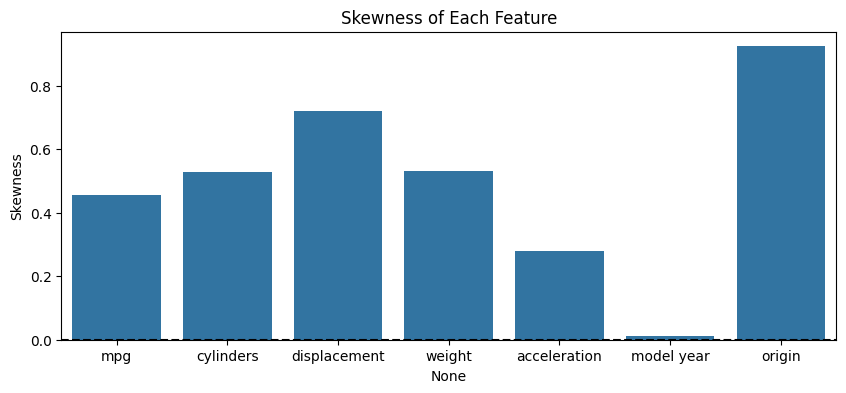

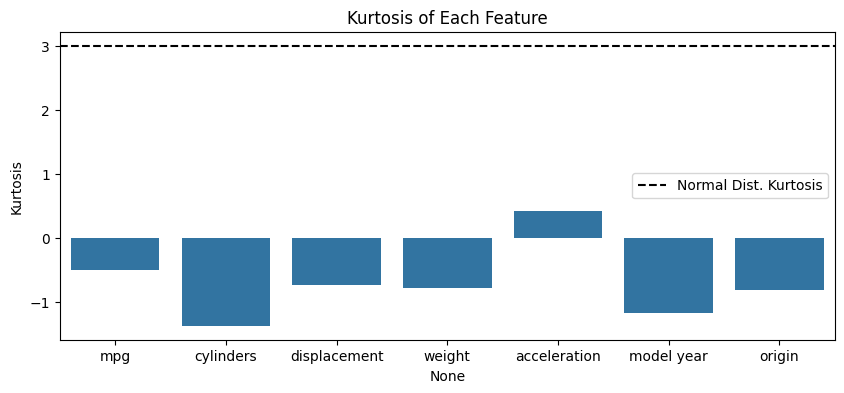

In [15]:
# @title Plots

skew_values = df.skew(numeric_only=True)
kurt_values = df.kurt(numeric_only=True)

# plot skewness
plt.figure(figsize=(10, 4))
sns.barplot(x=skew_values.index, y=skew_values.values)
plt.title('Skewness of Each Feature')
plt.ylabel('Skewness')
plt.axhline(0, color='black', linestyle='--')
plt.show()

# plot kurtosis
plt.figure(figsize=(10, 4))
sns.barplot(x=kurt_values.index, y=kurt_values.values)
plt.title('Kurtosis of Each Feature')
plt.ylabel('Kurtosis')
plt.axhline(3, color='black', linestyle='--', label='Normal Dist. Kurtosis')
plt.legend()
plt.show()

## Correlation and Heatmap

In [19]:
# @title Correlation
correlation = df.corr(numeric_only=True)
correlation

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


<Axes: >

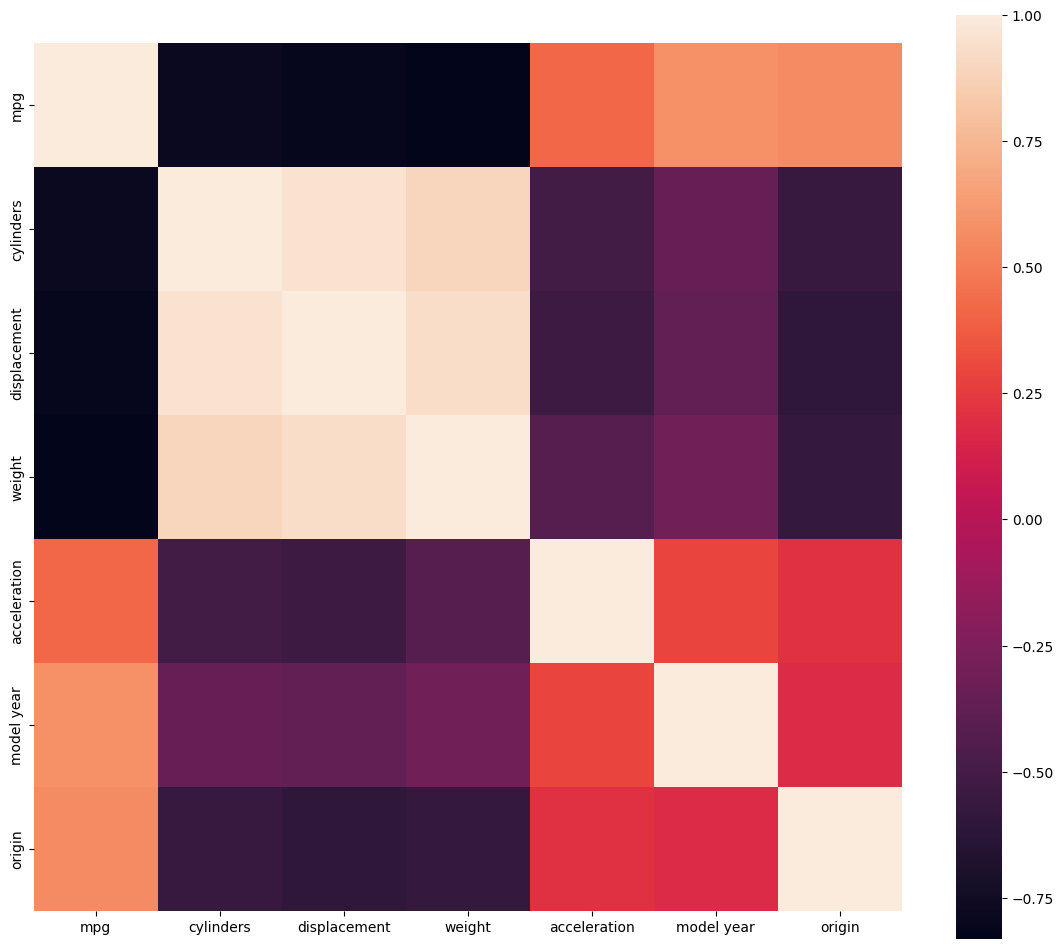

In [22]:
# @title Heatmap
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(correlation,square = True)

## Scatter plot for different parameters

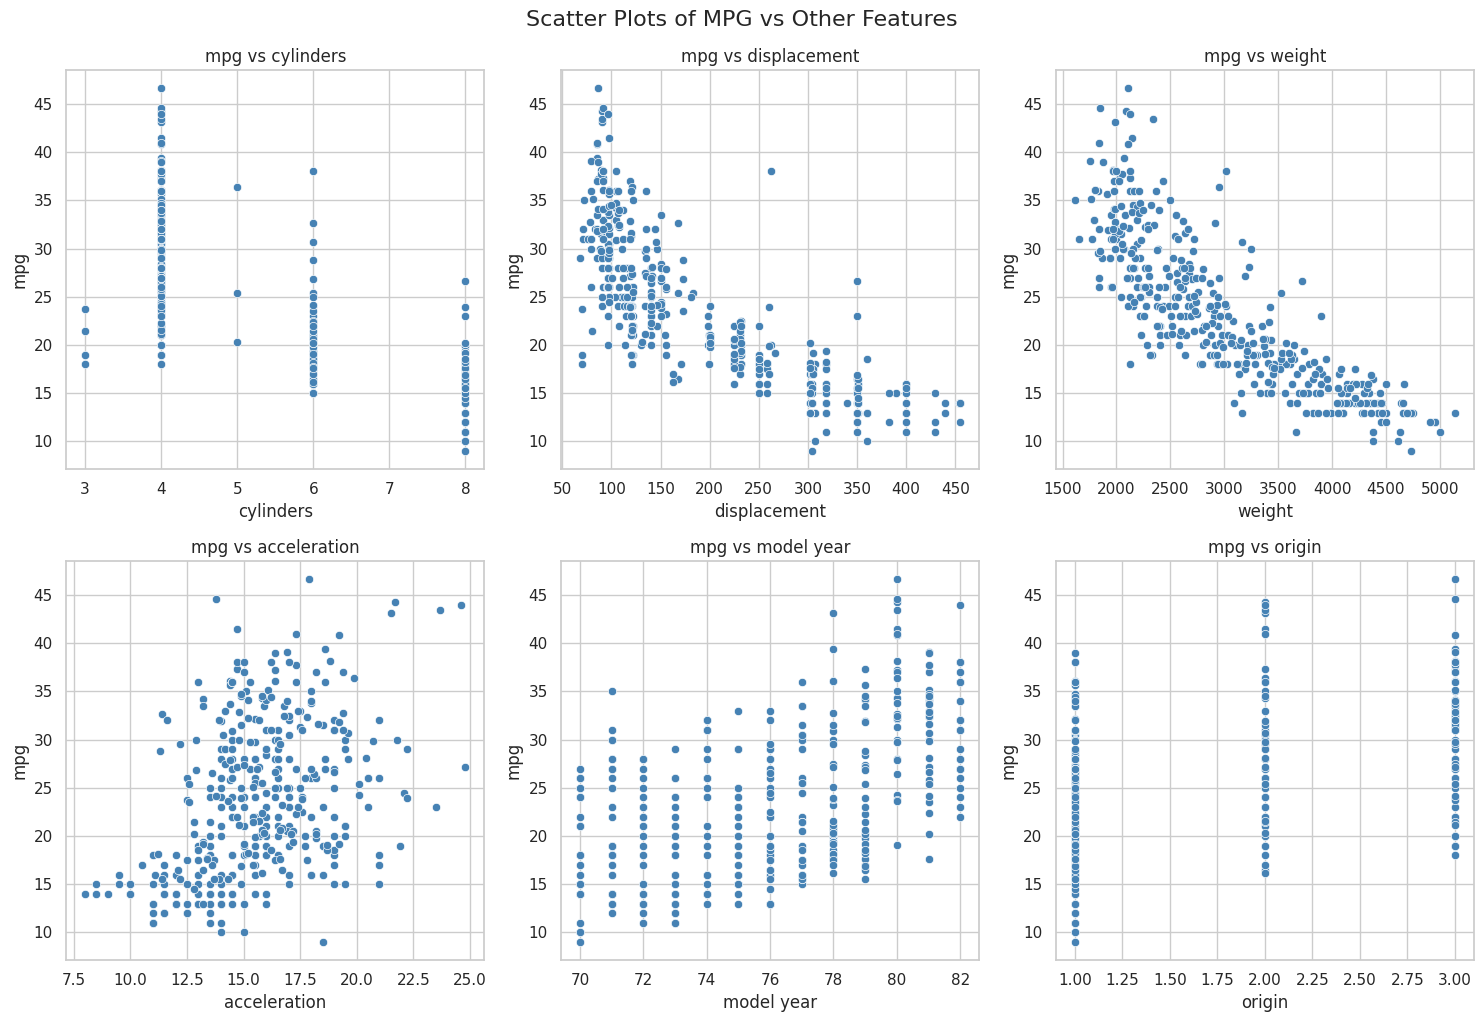

In [24]:
# @ title MPG vs everything else

features = ['cylinders', 'displacement', 'weight', 'acceleration', 'model year', 'origin']
target = 'mpg'

sns.set(style='whitegrid')

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(data=df, x=feature, y=target, color='steelblue')
    plt.title(f'{target} vs {feature}')
    plt.tight_layout()

plt.suptitle('Scatter Plots of MPG vs Other Features', fontsize=16, y=1.02)
plt.show()

## Encoding categories

In [26]:
# @title Get the unique Origin values
df['origin'].unique()

array([1, 3, 2])

In [36]:
# @title Encode

# map numeric codes to region names
df['origin'] = df['origin'].map({1: 'America', 2: 'Europe', 3: 'Asia'})

#one-hot encode the 'origin' column
origin_dummies = pd.get_dummies(df['origin'], prefix='origin')

#add the new columns to the DataFrame
df = pd.concat([df, origin_dummies], axis=1)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,origin_America,origin_Asia,origin_Europe
0,18.0,8,307.0,130,3504,12.0,70,America,chevrolet chevelle malibu,True,False,False
1,15.0,8,350.0,165,3693,11.5,70,America,buick skylark 320,True,False,False
2,18.0,8,318.0,150,3436,11.0,70,America,plymouth satellite,True,False,False
3,16.0,8,304.0,150,3433,12.0,70,America,amc rebel sst,True,False,False
4,17.0,8,302.0,140,3449,10.5,70,America,ford torino,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,America,ford mustang gl,True,False,False
394,44.0,4,97.0,52,2130,24.6,82,Europe,vw pickup,False,False,True
395,32.0,4,135.0,84,2295,11.6,82,America,dodge rampage,True,False,False
396,28.0,4,120.0,79,2625,18.6,82,America,ford ranger,True,False,False
